# Data cleaning
In this notebook I will begin the process of cleaning up the data handling any missing information. In each section below, I will be focusing on subsets of the data, but I will be editing the original dataframe itself so that I have a completely cleaned, complete dataframe at the end of the notebook.

In [1]:
import numpy as np
import pandas as pd
import missingno as msno  # <- missingno from lab 2.01

In [2]:
df = pd.read_csv('../datasets/provided_data/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Initial Look and Finding Nulls

In [3]:
df.shape

(2051, 81)

There are 2051 total rows and 81 total columns in the initial dataset.

In [4]:
# https://datatofish.com/columns-nan-pandas-dataframe/ for help making it clean
cols_with_null = df.columns[df.isnull().any()]

In [5]:
null_df = df[cols_with_null]
null_df.isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

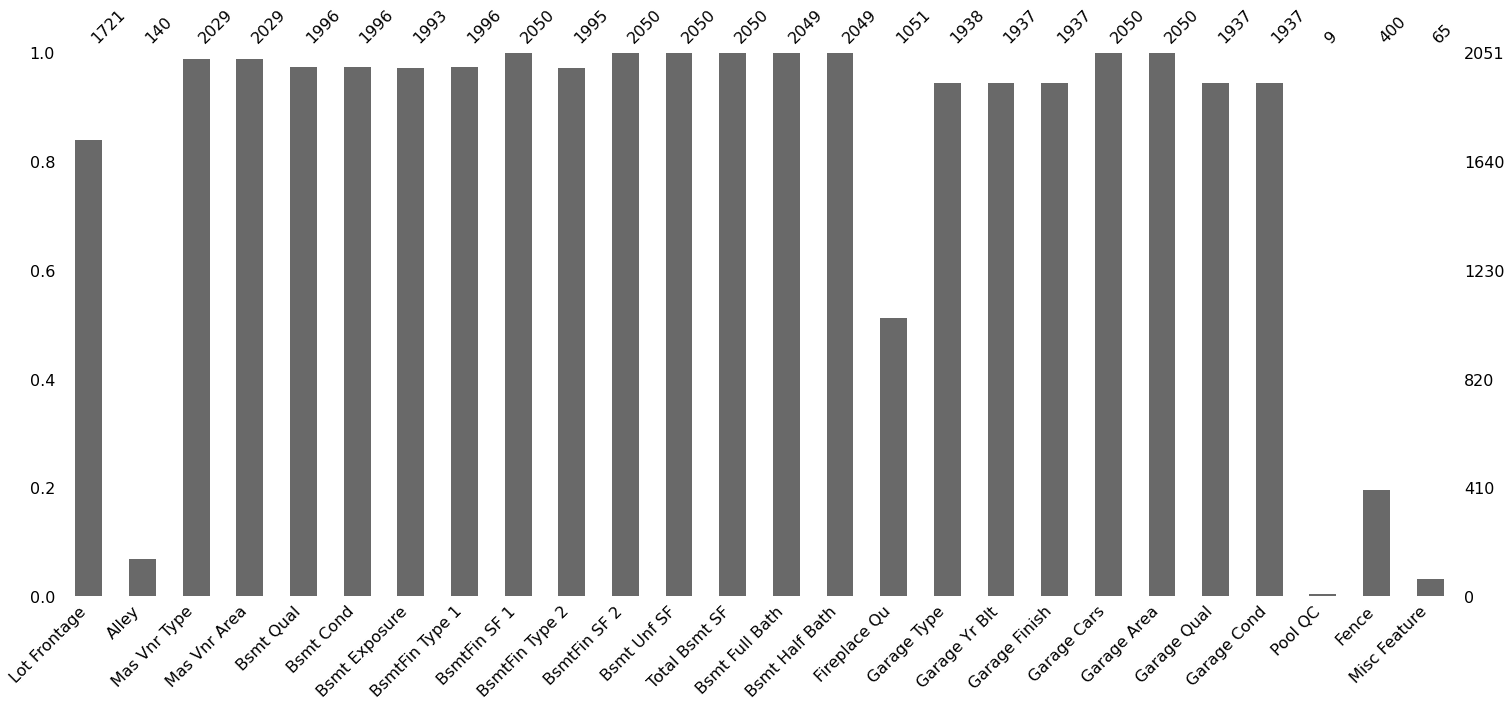

In [6]:
msno.bar(null_df);

## Numeric Data Only
The numeric only data will be in the 02.1_Numeric_EDA_and_Feat_Engineering notebook.

#### Non Null Columns
To get get started, I am going to save a csv using only numeric columns with no null values and see how that looks as an MLR model as is. I will fix any numeric columns that are categorical in nature that need to be and make sure they make sense. I'll also make sure nothing unexpected is in the remaining columns.

In [7]:
df_num_without_null = df[df.columns[df.isnull().sum() == 0]]._get_numeric_data().drop(columns='SalePrice')
# Dropping 'SalePrice' as I am not going to touch it

In [8]:
df_num_without_null.columns
# Id, PID, MS Subclass are categorical

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [9]:
df['Id'].value_counts()
# No duplicate Ids

109     1
1377    1
1521    1
1719    1
1221    1
       ..
1965    1
1598    1
1796    1
2619    1
10      1
Name: Id, Length: 2051, dtype: int64

In [10]:
df['PID'].value_counts()
# No duplicates

533352170    1
905100020    1
909201110    1
528174040    1
534451170    1
            ..
535453150    1
923225370    1
528458080    1
535426195    1
527162130    1
Name: PID, Length: 2051, dtype: int64

In [11]:
df['MS SubClass'].unique() 
# Will split into dummy categories after submitting the intial, as is numeric model
# Otherwise, all unique numbers are in data dictionary, so good to go there.

array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
        45,  40, 150], dtype=int64)

In [12]:
df['Lot Area'].describe()
# No negative or 0 sqft lots. Good to go for EDA

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: Lot Area, dtype: float64

In [13]:
df[['Overall Qual', 'Overall Cond']].describe()
# Nothing outside the range listed in the data dictionary of 1 - 10

,Overall Qual,Overall Cond
count,2051.000000,2051.000000
mean,6.112140,5.562165
std,1.426271,1.104497
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,5.000000
75%,7.000000,6.000000
max,10.000000,9.000000


In [14]:
df[['Year Built', 'Year Remod/Add']].describe()
# Nothing absurdly old or built in the future

,Year Built,Year Remod/Add
count,2051.000000,2051.000000
mean,1971.708922,1984.190151
std,30.177889,21.036250
min,1872.000000,1950.000000
25%,1953.500000,1964.500000
50%,1974.000000,1993.000000
75%,2001.000000,2004.000000
max,2010.000000,2010.000000


In [15]:
(df['1st Flr SF'] < df['Lot Area']).sum(), (df['1st Flr SF'] < 0).sum()
# No first floors larger than lot size or negative

(2051, 0)

In [16]:
(df['2nd Flr SF'] < df['Lot Area']).sum(), (df['2nd Flr SF'] < 0).sum()
# No second floors larger than lot size or negative

(2051, 0)

In [17]:
df[['Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val']].describe()

# No category above has a negative number, which is all I wanted to check for these variables

,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,5.512921,1499.330083,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354
std,51.068870,500.447829,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985
min,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1129.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1444.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1728.500000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000


In [18]:
df['Mo Sold'].sort_values().unique()
# All months accounted for.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
df['Yr Sold'].sort_values().unique()
# Nothing unexpected

array([2006, 2007, 2008, 2009, 2010], dtype=int64)

All the data here seems like it is appropriate and won't throw anything off. The only column I will look at making dummies of is 'MS SubClass', but I will do that in EDA to see if it makes a difference or would be useful.

In [20]:
df_num_without_null.to_csv('../datasets/cleaned_data/feat_v1.csv', index=False)

#### Columns with Nulls
In this section I am going to clean all of the numeric columns with nulls in them, if any. I will explain my decision with each column as I work on it. 

In [21]:
df_num_with_null = df[df.columns[df.isnull().sum() != 0]]._get_numeric_data()
df_num_with_null.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [22]:
df_num_with_null['Lot Frontage'].describe()
# Based on the description of the feature, and the fact that there are no 0s
# I am going to assume that the NaNs are supposed to be 0, meaning 0 linear feet

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [23]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [24]:
df_num_with_null['Mas Vnr Area'].describe()
# There are 0s in this dataset, so need to look closer at the rows where it is missing.

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64

In [25]:
# https://blog.softhints.com/pandas-display-all-columns-and-show-more-rows/ for help showing all rows
with pd.option_context('display.max_columns', 90):
    display(df[df['Mas Vnr Area'].isnull()])
# This looks to be related to 'Mas Vnr Type', so I will be analyzing that below instead of in the object section
# Same number of nulls for both columns and all the ones below show NaNs

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0

In [26]:
df['Mas Vnr Type'].value_counts()
# While there is a None option, the fact that there is no square footage listed or type given,
# I would find it likely that the NaNs are supposed to be None and 0s

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [27]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [28]:
df[['Mas Vnr Area', 'Mas Vnr Type']].dtypes

Mas Vnr Area    float64
Mas Vnr Type     object
dtype: object

In [29]:
df[['Mas Vnr Area', 'Mas Vnr Type']].isnull().sum()

Mas Vnr Area    0
Mas Vnr Type    0
dtype: int64

In [30]:
df[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].describe()
# There are very few missing values for this one, but there are 0s, so need to review them to see what's happening.

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
count,2050.000000,2050.000000,2050.000000,2050.000000
mean,442.300488,47.959024,567.728293,1057.987805
std,461.204124,165.000901,444.954786,449.410704
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,220.000000,793.000000
50%,368.000000,0.000000,474.500000,994.500000
75%,733.750000,0.000000,811.000000,1318.750000
max,5644.000000,1474.000000,2336.000000,6110.000000


In [31]:
with pd.option_context('display.max_columns', 90):
    display(df[df['BsmtFin SF 1'].isnull()])
# All the NaNs for above stem from this one entry. There is no information at all on a basement
# So it is safe to assume that there is not one, thus everything above could be set to 0

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [32]:
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
df[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().sum()

BsmtFin SF 1     0
BsmtFin SF 2     0
Bsmt Unf SF      0
Total Bsmt SF    0
dtype: int64

In [33]:
df[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].dtypes

BsmtFin SF 1     float64
BsmtFin SF 2     float64
Bsmt Unf SF      float64
Total Bsmt SF    float64
dtype: object

In [34]:
df[['Bsmt Full Bath', 'Bsmt Half Bath']].describe()
# There are 0s, but there are only two missing data points for each, so most likely NaN was supposed to be 0

,Bsmt Full Bath,Bsmt Half Bath
count,2049.000000,2049.000000
mean,0.427526,0.063446
std,0.522673,0.251705
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,3.000000,2.000000


In [35]:
with pd.option_context('display.max_columns', 90):
    display(df[df['Bsmt Full Bath'].isnull()])
# Appears that the two missing data points are the same two for each. Looks like there is no basement
# Thus, setting these to 0

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [36]:
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
df[['Bsmt Full Bath', 'Bsmt Half Bath']].isnull().sum()

Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [37]:
df[['Bsmt Full Bath', 'Bsmt Half Bath']].dtypes

Bsmt Full Bath    float64
Bsmt Half Bath    float64
dtype: object

In [38]:
df[['Garage Yr Blt', 'Garage Cars', 'Garage Area']].describe()
# There are 0s for Cars and Area, but not for Year. Need to look at how to address each

,Garage Yr Blt,Garage Cars,Garage Area
count,1937.000000,2050.000000,2050.000000
mean,1978.707796,1.776585,473.671707
std,25.441094,0.764537,215.934561
min,1895.000000,0.000000,0.000000
25%,1961.000000,1.000000,319.000000
50%,1980.000000,2.000000,480.000000
75%,2002.000000,2.000000,576.000000
max,2207.000000,5.000000,1418.000000


In [39]:
with pd.option_context('display.max_columns', 90, 'display.max_rows', 150):
    display(df[df['Garage Yr Blt'].isnull()].loc[:, ['Garage Type','Garage Yr Blt','Garage Cars', 'Garage Area']])
# ALl but one appears to have no garage information, thus those can be turned into 0. 
# However, the only line missing garage cars and area is the same for both, which has the detatched type. 
# I will correct this line first by filling in the mean for detached garage area and cars, and set the 
# year built to the year the house was built.
# I will then 

,Garage Type,Garage Yr Blt,Garage Cars,Garage Area
28,NaN,NaN,0.0,0.0
53,NaN,NaN,0.0,0.0
65,NaN,NaN,0.0,0.0
79,NaN,NaN,0.0,0.0
101,NaN,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0
114,NaN,NaN,0.0,0.0
120,NaN,NaN,0.0,0.0
134,NaN,NaN,0.0,0.0
136,NaN,NaN,0.0,0.0


All but one appears to have no garage information, thus those can be turned into 0. However, the only line missing both garage cars and area (index 1712, which accounts for the one NaN for each column) has the detatched type listed. I will correct this row first by filling in the mean for detached garage area and cars, and set the year built to the year the house was built. I will then set the garage year built for the remaining NaNs to 0 as there is no garage.

In [40]:
df.loc[1712, 'Garage Cars'] = df.groupby('Garage Type').mean().loc['Detchd','Garage Cars']
df.loc[1712, 'Garage Cars']

1.5588785046728972

In [41]:
df.loc[1712, 'Garage Area'] = df.groupby('Garage Type').mean().loc['Detchd','Garage Area']
df.loc[1712, 'Garage Area']

419.54392523364487

In [42]:
df.loc[1712, 'Garage Yr Blt'] = df.loc[1712, 'Year Built']

In [43]:
df.loc[1712, ['Garage Type','Garage Yr Blt','Garage Cars', 'Garage Area']]

Garage Type          Detchd
Garage Yr Blt        1923.0
Garage Cars        1.558879
Garage Area      419.543925
Name: 1712, dtype: object

In [44]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [45]:
df[['Garage Yr Blt', 'Garage Cars', 'Garage Area']].dtypes

Garage Yr Blt    float64
Garage Cars      float64
Garage Area      float64
dtype: object

In [46]:
df[['Garage Yr Blt', 'Garage Cars', 'Garage Area']].isnull().sum()

Garage Yr Blt    0
Garage Cars      0
Garage Area      0
dtype: int64

In [47]:
df[df_num_with_null.columns].to_csv('../datasets/cleaned_data/num_was_null_feat.csv', index=False)
# Using only for column headers in 02.1_Numeric_EDA_and_Feat_Engineering

All numeric columns have now been fixed so that there are no nulls. I will transfer over the cleaning steps to the final notebook, 04_Final_Submission since I may have to clean up the Test dataset the same way. Pretty much everything was replacable by 0s, with one exception. I will address all of the object datatype columns below. 

## Object Data
All object data is going to be in the 02.2_Object_EDA_and_Feat_Engineering notebook. In this section I will be cleaning the object datatype columns and trying to determine the best way for them to be represented. If that decision is as dummy values, I will create the dummies in the EDA section.

In [48]:
null_obj_cols = df.columns[df.isnull().any()]
null_obj_cols

Index(['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [49]:
# https://www.geeksforgeeks.org/select-columns-with-specific-data-types-in-pandas-dataframe/ helped get object only columns
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [50]:
df['MS Zoning'].value_counts()
# So long as the test dataset has the C, A, and I classification with (all) or (agr) at the end, it should work fine. 
# This dataset is best looked at as dummies, so nothing will be changed here.

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [51]:
df['Street'].value_counts()
# This can easily be switched to 1 for Paved and 0 for gravel since there are only 7 lots with gravel

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [52]:
df['Street'] = df['Street'].map({'Pave': 1, 'Grvl': 0})
df['Street'].dtype

dtype('int64')

In [53]:
df['Alley'].value_counts()
# An easy fix. NA was converted to NaN, so it just needs converted back. 
# Will dummy this column as well to see if it is pertinent

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [54]:
df['Alley'] = df['Alley'].fillna('NA')
df['Alley'].isnull().sum()

0

In [55]:
df['Lot Shape'].value_counts()
# Since this is already a scale more or less, I can convert Reg to be 0,
# IR1 as 1, IR2 as 2, and IR3 as 3 to follow the scale they already set. 

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [56]:
df['Lot Shape'] = df['Lot Shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
df['Lot Shape'].dtype

dtype('int64')

In [57]:
df['Land Contour'].value_counts()
# This can be dummied. I considered a scale, but without more details I can't effectively scale it.

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

In [58]:
df['Utilities'].value_counts()
# I don't think this will play a factor since only 2 properties differ. If it does, I will dummy it out as needed. 

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [59]:
df['Lot Config'].value_counts()
# This is a dummy category for sure. No real way to scale corner vs. cul-de-sac vs. inside lot. 

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [60]:
df['Land Slope'].value_counts()
# This is a scale, so I am going to convert it to 1 for gentle, 2 for moderate, and 3 for severe.

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [61]:
df['Land Slope'] = df['Land Slope'].map({'Gtl': 1, 'Mod': 2, 'Sev': 3})
df['Land Slope'].dtype

dtype('int64')

In [62]:
df['Neighborhood'].value_counts()
# Definitely a dummy. There is no way to make this numeric with the available data.
# Maybe a scale can be established in EDA if it is obvious.

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [63]:
df['Condition 1'].value_counts()
# Cannot scale this numerically, thus can only be dummied.

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [64]:
df['Condition 2'].value_counts()
# Same as above

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

In [65]:
df['Bldg Type'].value_counts()
# Can almost be a numeric scale, but not quite.

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [66]:
df['House Style'].value_counts()
# It is tempting to put this on a numeric scale, but I don't know what I would put 
# Split Foyer and Split level as numerically, thus I'll leave alone for now.

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [67]:
df['Roof Style'].value_counts()
# Definitely a dummy category if there is a correlation

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

In [68]:
df['Roof Matl'].value_counts()
# Dummy, if there is a correlation

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

In [69]:
df['Exterior 1st'].value_counts()
# Both this and Exterior 2nd are basically the same. Need to be dummied if they matter.

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [70]:
df['Exter Qual'].value_counts()
# Easy conversion. Ex (Excellent) is 5, Gd (Good) is 4, TA (Average/Typical) is 3, Fa (Fair) is 2, Po (Poor) is 1

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [71]:
df['Exter Qual'] = df['Exter Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['Exter Qual'].dtype

dtype('int64')

In [72]:
df['Exter Cond'].value_counts()
# Exactly the same as above.

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [73]:
df['Exter Cond'] = df['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['Exter Cond'].dtype

dtype('int64')

In [74]:
df['Foundation'].value_counts()
# Can't easily be scaled. Maybe in EDA if there is a correlation.

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [75]:
null_obj_cols

Index(['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [76]:
obj_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [77]:
df['Bsmt Qual'].value_counts()
# No NA listed, so that means the NaNs are supposed to be NA. 
# Once NaNs replaced, can convert to scale similar to above with the only difference
# being that 'NA' will be 0

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [78]:
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('NA')
df['Bsmt Qual'].isnull().sum()

0

In [79]:
df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['Bsmt Qual'].dtype

dtype('int64')

In [80]:
df['Bsmt Cond'].value_counts()
# Exactly the same as above.

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [81]:
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('NA')
df['Bsmt Cond'].isnull().sum()

0

In [82]:
df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['Bsmt Cond'].dtype

dtype('int64')

In [83]:
df['Bsmt Exposure'].value_counts()
# Similar to above. NaNs need to converted to 'NA'
# I am converting this to the following: Gd (Good Exposure) to 4, Av (Average Exposure) to 3, 
# Mn (Minimum Exposure) to 2, No (No exposure) to 1, and NA to 0. I am doing this because of how it's worded makes
# it sound like having exposure is a good thing compared to not having it. 

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [84]:
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('NA')
df['Bsmt Exposure'].isnull().sum()

0

In [85]:
df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
df['Bsmt Exposure'].dtype

dtype('int64')

In [86]:
df['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

Once again, NaNs need converted to 'NA'. This is a little tricky as it can be scaled, but is Average Rec Room below a Below Average Living Quarters? I am going to say it is because of how the list is set up in the data dictionary. I may tweek it so that Average Rec Room is at the same rating as Average Living Quarters, but that will be determined through EDA for sure. For right now, the new ranking is GLQ (Good Living Quarters) as 6, ALQ (Average Living Quarters) as 5, BLQ (Below Average Livings Quarters) as 4, Rec (Average Rec Room) as 3, LwQ (Low Quality) as 2, Unf (Unfinished) as 1, NA as 0. The exact same thing is applied to 'BsmtFin Type 2'. 

In [87]:
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('NA')
df['BsmtFin Type 1'].isnull().sum()

0

In [88]:
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
df['BsmtFin Type 1'].dtype

dtype('int64')

In [89]:
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('NA')
df['BsmtFin Type 2'].isnull().sum()

0

In [90]:
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
df['BsmtFin Type 2'].dtype

dtype('int64')

In [91]:
df['Heating'].value_counts()
# Will dummy out if EDA shows that it is important.

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

In [92]:
df['Heating QC'].value_counts()
# Easy conversion. Ex (Excellent) is 5 down to 1 for Po (Poor).

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [93]:
df['Heating QC'] = df['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['Heating QC'].dtype

dtype('int64')

In [94]:
df['Central Air'].value_counts()
# Converting to 1 for yes, 0 for no.

Y    1910
N     141
Name: Central Air, dtype: int64

In [95]:
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})
df['Central Air'].dtype

dtype('int64')

In [96]:
df['Electrical'].value_counts()
# Leaving as is. Can dummy out to see if it has any merit.

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [97]:
df['Kitchen Qual'].value_counts()
# Same Change, Different Feature. Ex is a 5 and Po is a 1

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [98]:
df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['Kitchen Qual'].dtype

dtype('int64')

In [99]:
df['Functional'].value_counts()
# This is going to be put on a scale: Sal (Salvage only) is a 0, Sev (Severely Damaged) is a 1, 
# Maj2 (Major Deductions 2) is a 2, Maj1 (Major Deductions 1) is a 3, Mod (Moderate Deductions) is a 4, 
# Min2 (Minor Deductions 2) is a 5, Min1 (Minor Deductions 1) is a 6, and Typ (Typical Functionality) is a 7

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [100]:
df['Functional'] = df['Functional'].map({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 
                      'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7})
df['Functional'].dtype

dtype('int64')

In [101]:
null_obj_cols

Index(['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [102]:
obj_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [103]:
df['Fireplace Qu'].value_counts()
# NaNs need to be turned to 'NA', and then the standard scale of 5 for Ex to 0 for NA applied.

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [104]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('NA')
df['Fireplace Qu'].isnull().sum()

0

In [105]:
df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['Fireplace Qu'].dtype

dtype('int64')

In [106]:
df['Garage Type'].value_counts()
# Fill in the NaNs with NA. This is a dummy column for sure

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [107]:
df['Garage Type'] = df['Garage Type'].fillna('NA')
df['Garage Type'].isnull().sum()

0

In [108]:
df['Garage Finish'].value_counts()
# Same as above, NA for the NaNs

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [109]:
df['Garage Finish'] = df['Garage Finish'].fillna('NA')
df['Garage Finish'].isnull().sum()

0

In [110]:
df['Garage Qual'].value_counts()
# Fill NA for NaNs, set on same scale as before

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [111]:
df['Garage Qual'] = df['Garage Qual'].fillna('NA')
df['Garage Qual'].isnull().sum()

0

In [112]:
df['Garage Qual'] = df['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['Garage Qual'].dtype

dtype('int64')

In [113]:
df['Garage Cond'].value_counts()
# Same as up above.

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [114]:
df['Garage Cond'] = df['Garage Cond'].fillna('NA')
df['Garage Cond'].isnull().sum()

0

In [115]:
df['Garage Cond'] = df['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
df['Garage Cond'].dtype

dtype('int64')

In [116]:
df['Paved Drive'].value_counts()
# For this one, I'm doing 1 for Paved, 0.5 for partial pavement, and 0 for dirt/gravel
# This seems like a reasonable scale since it's normally 1 for yes (paved), 0 for no (dirt)
# and partial would be inbetween (0.5)

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

In [117]:
df['Paved Drive'] = df['Paved Drive'].map({'Y': 1, 'P': 0.5, 'N': 0})
df['Paved Drive'].dtype

dtype('float64')

In [118]:
df['Pool QC'].value_counts()
# Fill NaNs with NA and then put on scale with Ex being 4 and NA being 0

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [119]:
df['Pool QC'] = df['Pool QC'].fillna('NA')
df['Pool QC'].isnull().sum()

0

In [120]:
df['Pool QC'] = df['Pool QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})
df['Pool QC'].dtype

dtype('int64')

In [121]:
df['Fence'].value_counts()
# NaNs to NA. Not going to set this to a scale just yet because I don't know which is better, Good Wood or Minimum Privacy

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [122]:
df['Fence'] = df['Fence'].fillna('NA')
df['Fence'].isnull().sum()

0

In [123]:
df['Misc Feature'].value_counts()
# Changing NaNs to NA, but that's it. No real way to do this without dummies.

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [124]:
df['Misc Feature'] = df['Misc Feature'].fillna('NA')
df['Misc Feature'].isnull().sum()

0

In [125]:
df['Sale Type'].value_counts()
# Leave this as is and will dummy out.

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

In [126]:
df[obj_cols].to_csv('../datasets/cleaned_data/obj_feats.csv', index=False)
# Saving Object dataframe

After going through all of the object datatype columns, I noticed that a lot of the ones that had NaNs in them were cells that were originally filled with 'NA', but pandas converted them to NaNs. This made the cleanup a little easier. A bunch of the features could also be put on a numeric scale, which is nice and easy to calculate. Kind of makes me wonder why they didn't in the first place. The columns from this section will be explored in the 02.2_Object_EDA_and_Feat_Engineering notebook, especially dummying the columns and seeing how they relate to sale price. 

## Separating the Object Data that was Converted to Numeric
Here I am separating the converted numeric data to be added into notebook 02.1

In [127]:
obj_feat_df = df[obj_cols]
obj_feat_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,1,NA,1,Lvl,AllPub,CulDSac,1,Sawyer,RRAe,...,0,Attchd,RFn,3,3,1.0,0,NA,NA,WD
1,RL,1,NA,1,Lvl,AllPub,CulDSac,1,SawyerW,Norm,...,3,Attchd,RFn,3,3,1.0,0,NA,NA,WD
2,RL,1,NA,0,Lvl,AllPub,Inside,1,NAmes,Norm,...,0,Detchd,Unf,3,3,1.0,0,NA,NA,WD
3,RL,1,NA,0,Lvl,AllPub,Inside,1,Timber,Norm,...,0,BuiltIn,Fin,3,3,1.0,0,NA,NA,WD
4,RL,1,NA,1,Lvl,AllPub,Inside,1,SawyerW,Norm,...,0,Detchd,Unf,3,3,0.0,0,NA,NA,WD


In [128]:
now_num = obj_feat_df._get_numeric_data()
now_num.head()

,Street,Lot Shape,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Kitchen Qual,Functional,Fireplace Qu,Garage Qual,Garage Cond,Paved Drive,Pool QC
0,1,1,1,4,3,3,3,1,6,1,5,1,4,7,0,3,3,1.0,0
1,1,1,1,4,3,4,3,1,6,1,5,1,4,7,3,3,3,1.0,0
2,1,0,1,3,4,3,3,1,6,1,3,1,4,7,0,3,3,1.0,0
3,1,0,1,3,3,4,3,1,1,1,4,1,3,7,0,3,3,1.0,0
4,1,1,1,3,3,2,4,1,1,1,3,1,3,7,0,3,3,0.0,0


In [129]:
now_num.to_csv('../datasets/cleaned_data/obj_to_num.csv', index=False)

## Saving the completed, clean testing datasheet
Now that I have addressed everything, I am going to confirm there are no nulls and then save it as the clean training dataset to be used in everything else.

In [130]:
df.isnull().sum()
# No nulls

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [131]:
df.to_csv('../datasets/cleaned_data/clean_train_v1.csv', index=False)

## Next Steps


The data has been cleaned and all of the nulls have been addressed. I will now be doing EDA and model testing in the next notebooks. The 02 notebooks are broken down so that they are not overly cluttered and keep having to jump around in them. When I am ready to make a submission to Kaggle, I will be moving the features I am using as a dataframe to the 03 notebook to use for it's columns and to make sure the actual data in the test dataset matches what I need it to look like for the model to work. The final notebook, 04, is the notebook that will have my final, best model in it along with the steps taken to make it work. 